**Exploratory Data Analysis - Terrorism**


---
Exploratory Data Analysis(EDA) is used by data scientists to analyze and investigate data sets and summarize the results.
It also helps to investigate the statistical techniques that are being used in data analysis are appropriate or not.



**Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data set 

In [5]:
td = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1', low_memory=False)
td.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53051 entries, 0 to 53050
Columns: 135 entries, eventid to related
dtypes: float64(60), int64(18), object(57)
memory usage: 54.6+ MB


In [7]:
td.nunique()

eventid       53051
iyear            23
imonth           13
iday             32
approxdate       24
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related        3995
Length: 135, dtype: int64

In [8]:
td.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,5.305100e+04,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,50170.000000,5.017000e+04,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,8771.000000,53051.000000,53051.000000,53051.000000,53051.000000,42.000000,2.000000,53051.000000,50771.000000,52822.000000,565.000000,421.000000,508.000000,86.000000,64.000000,84.000000,0.0,53050.000000,130.000000,11.000000,53050.000000,7668.000000,1258.000000,1262.000000,319.000000,19.000000,18.000000,8.0,8.000000,51.000000,53050.000000,45025.000000,3024.000000,2513.000000,376.000000,324.000000,66.000000,62.000000,47238.000000,2986.000000,2900.000000,45413.000000,2935.000000,2611.000000,53050.000000,16852.000000,9.764000e+03,52875.000000,3222.000000,3222.000000,1011.000000,763.000000,52691.000000,5.460000e+02,1.0,1.210000e+02,2.0,1255.000000,953.000000,53050.000000,53050.000000,53050.000000,53050.000000
mean,1.984685e+11,1984.619668,6.346742,15.343537,0.016437,152.438088,5.405836,16.980236,-1.738413e+03,1.419389,0.035871,0.990519,0.991612,0.855309,-1.380068,1.172386,0.099112,0.919210,0.000792,2.994967,4.523810,3.000000,7.678102,44.721475,130.142668,9.035398,46.814727,170.645669,7.372093,45.828125,143.130952,NaN,0.045768,0.169231,0.090909,0.001112,7.862285,-72.561208,-0.027734,4.448276,0.947368,5.611111,1.0,8.000000,0.176471,6.386635,9.945986,6.444114,10.001194,6.603723,9.932099,6.287879,10.467742,2.075236,0.295378,0.517931,1.704732,0.579557,0.062045,0.724920,3.387076,5.101418e+05,0.060936,0.727498,0.082868,16.248269,29.804718,0.010571,3.341840e+06,20000.0,1.157920e+06,0.0,3.038247,8.665268,-3.214138,-3.171762,0.151065,-2.482092
std,5.432548e+08,5.433299,3.354164,8.833502,0.127150,137.827228,3.188807,25.175289,3.847814e+05,1.100270,0.185971,0.096911,0.091203,0.351792,3.488383,0.487162,0.298815,0.272515,0.028126,1.861144,2.471675,1.414214,6.787059,33.152069,73.881345,6.845469,29.929900,112.785673,6.276092,29.869321,80.833874,NaN,0.208984,0.376406,0.301511,0.033331,76.118148,44.368653,1.659813,3.153762,0.229416,3.821593,0.0,2.828427,0.385013,2.177147,7.177827,1.795403,7.269466,2.126628,7.890604,1.516729,7.787585,8.407816,5.689730,2.758540,9.951872,14.099887,0.354473,0.604712,0.517804,2.794150e+07,0.239215,381.688092,3.701316,124.999213,145.175430,0.102272,4.318649e+07,NaN,4.238150e+06,0.0,1.361982,33.166853,4.382547,4.433253,0.700933,4.331817
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,7.000000,6.000000,NaN,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.981041e+11,1981.000000,3.000000,8.000000,0.000000,61.000000,3.000000,4.528694,-7.697846e+01,1.000000,0.000000,1.000000,1.000000,1.

In [9]:
td.rename(columns = {'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country', 
          'provstate': 'State', 'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target'
          , 'nkill': 'Killed', 'nwound': 'Wounded', 'summary': 'Summary', 'gname': 'Group', 'targtype1_txt': 'Target_type', 'weaptype1_txt': 'Weapon_type'
          , 'motive': 'Motive'}, inplace = True)

In [12]:
td.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,State,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN




*   We can observe that there are around 135 columns in our data set.
*   We are going to try and find the hot zones so as to reduce the number of columns.


*   We are going to create a new variable and select a new set of columns instead of overwriting the existing ones.







In [16]:
trr=td[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
trr.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [17]:
trr.shape

(53051, 18)

In [18]:
trr.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            239
Region             0
city               0
latitude        2881
longitude       2881
AttackType         0
Killed          5813
Wounded         7638
Target           385
Summary        51793
Group              0
Target_type        0
Weapon_type        1
Motive         52074
dtype: int64

In [19]:
trr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53051 entries, 0 to 53050
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         53051 non-null  int64  
 1   Month        53051 non-null  int64  
 2   Day          53051 non-null  int64  
 3   Country      53051 non-null  object 
 4   State        52812 non-null  object 
 5   Region       53051 non-null  object 
 6   city         53051 non-null  object 
 7   latitude     50170 non-null  float64
 8   longitude    50170 non-null  float64
 9   AttackType   53051 non-null  object 
 10  Killed       47238 non-null  float64
 11  Wounded      45413 non-null  float64
 12  Target       52666 non-null  object 
 13  Summary      1258 non-null   object 
 14  Group        53051 non-null  object 
 15  Target_type  53051 non-null  object 
 16  Weapon_type  53050 non-null  object 
 17  Motive       977 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usa



*   We need to check the presence of null values in our data set.
*   We will calculate their percentage for our reference before handling them.



In [20]:
count = 0
for i in trr['Day']:
    if (i==0):
      count+=1
    else:
      count=count
print("Number of days entered as 0: ",count)

Number of days entered as 0:  576


In [21]:
c=0
for j in trr['Month']:
    if (j==0):
      c+=1
    else:
      c=c
print("Number of months enterd as 0: ",c)

Number of months enterd as 0:  20


We are assigning random dates and months who have their values as 0, so that we don't loose the information of other columns associated with that row.

In [22]:
trr['Day']=trr['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
trr['Month']=trr['Month'].apply(lambda x: np.random.randint(1,13) if x == 9 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
#Checking for days.
count = 0
for i in trr['Day']:
    if (i == 0):
      count+=1
    else:
      count=count
print("Number of days entered as 0: ",count)

Number of days entered as 0:  0


In [24]:
#Count for months.
c=0
for j in trr['Month']:
    if (j==0):
      c+=1
    else:
      c=c
print("Number of months enterd as 0: ",c)

Number of months enterd as 0:  20


**Finding missing value percentage**

In [26]:
def null_val_(trr): 
    null_val = trr.isnull().sum()
    null_val_p = 100 * trr.isnull().sum()/len(trr)
    null_val_ = pd.concat([null_val, null_val_p], axis=1)
    null_val_last = null_val_.rename(
    columns = {0 : 'Null Values', 1 : 'Percentage '})
    return null_val_last
null_val_(trr)

,Null Values,Percentage
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
State,239,0.450510
Region,0,0.000000
city,0,0.000000
latitude,2881,5.430623
longitude,2881,5.430623
AttackType,0,0.000000


In [29]:
trr['Motive'].fillna(value='NA', inplace=True) 
trr['Summary'].fillna(value='NA', inplace=True)
trr['city'].fillna(value='NA', inplace=True)
trr['Target'].fillna(value='NA', inplace=True)
trr["Killed"].fillna(trr["Killed"].mean(), inplace=True)
trr["Wounded"].fillna(trr["Wounded"].mean(), inplace=True)
trr["latitude"].fillna(trr["latitude"].mean(), inplace=True)
trr["longitude"].fillna(trr["longitude"].mean(), inplace=True)
trr['State'].fillna(value='NA', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,




*   We saw that some columns had high missing values and we had to handle them. 
*   All the columns with 'object' data type have been replaced by NA so that we don't loose information related to them.
*   Similarly we have replaced all columns having float datatype with their respective mean. 



In [30]:
trr.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    1
Motive         0
dtype: int64

We have handled all of our missing values successfully!

**Boxplots**

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


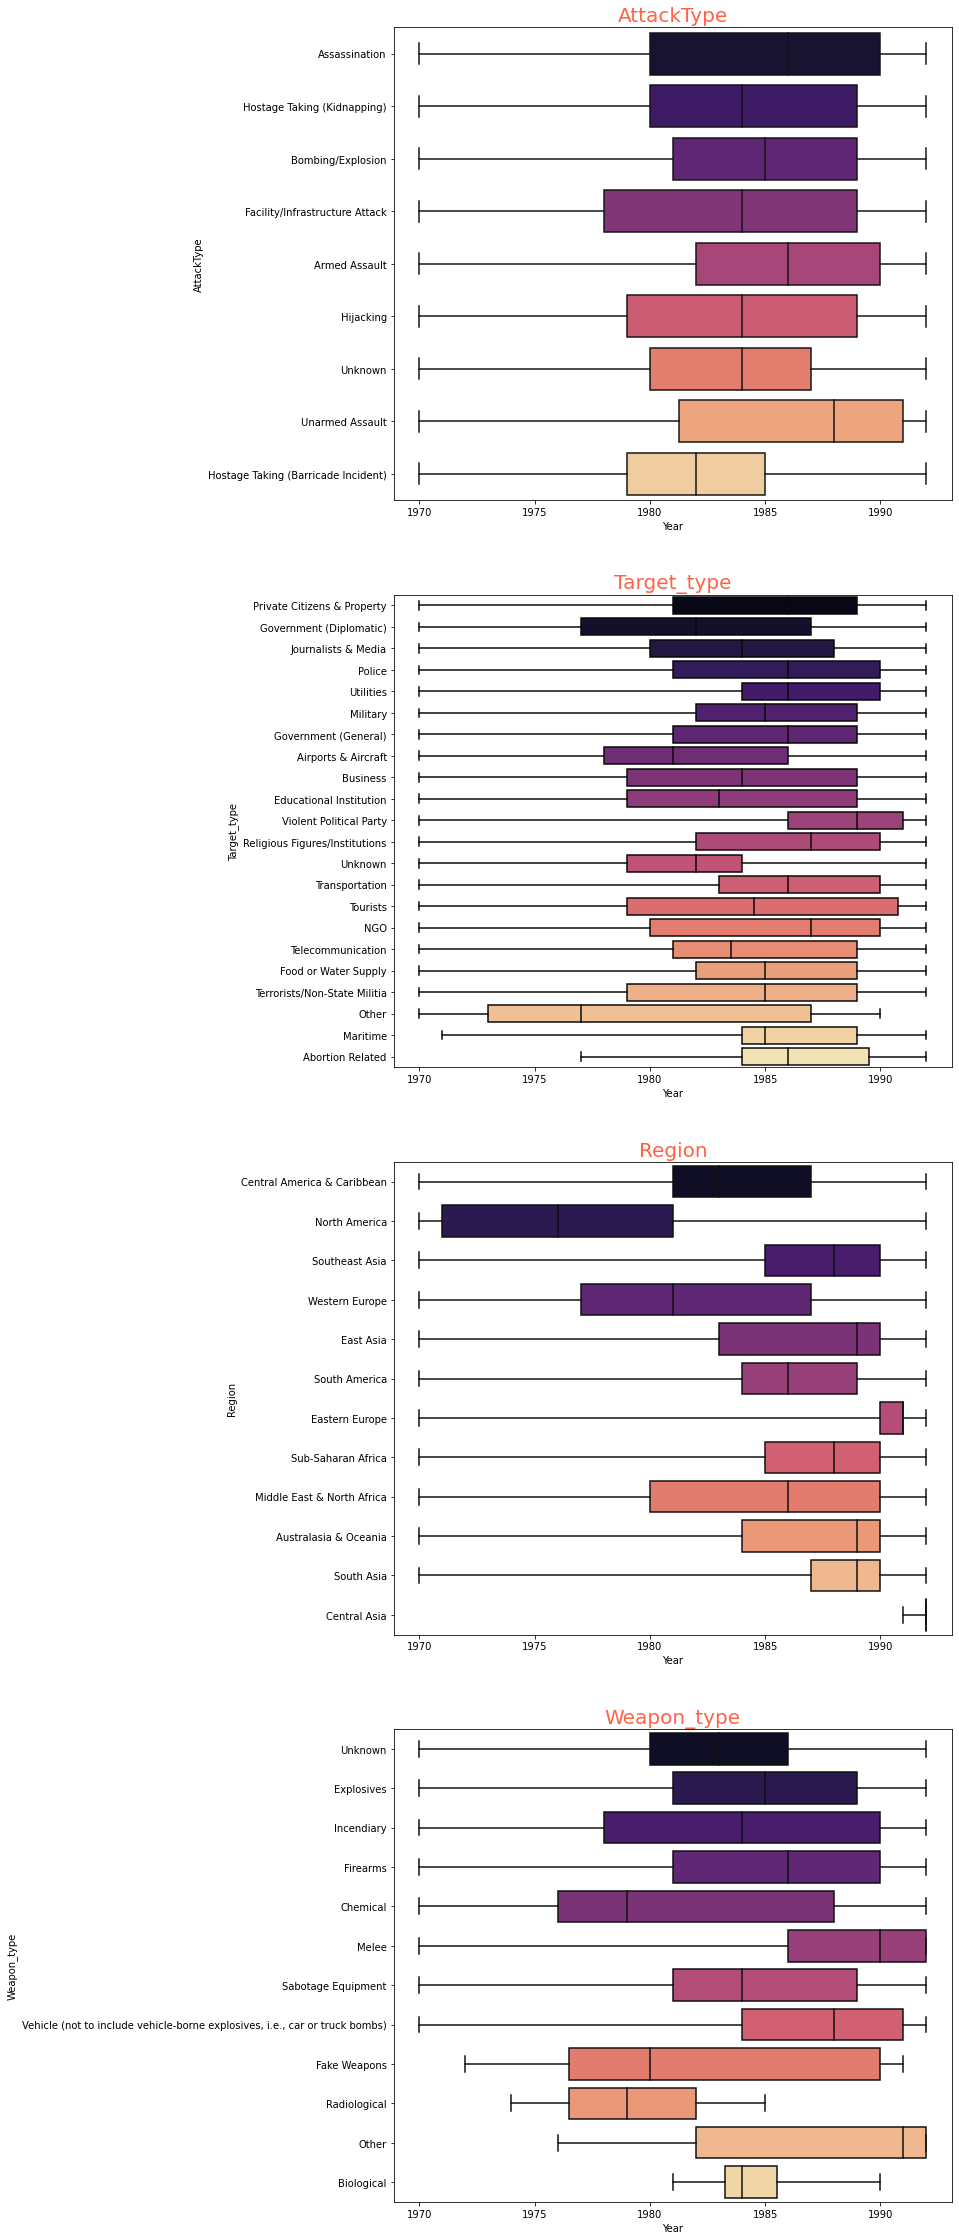

In [31]:
title_style = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 20 }
dict = {'AttackType':1,'Target_type':2,  'Region':3, 'Weapon_type':4 }
plt.figure(figsize=(10,40))

for value, i in dict.items():
    plt.subplot(4,1,i)
    sns.boxplot(x="Year", y=value, data=trr, whis=[0, 100], palette="magma")
    plt.title(value , fontdict = title_style)
plt.show()

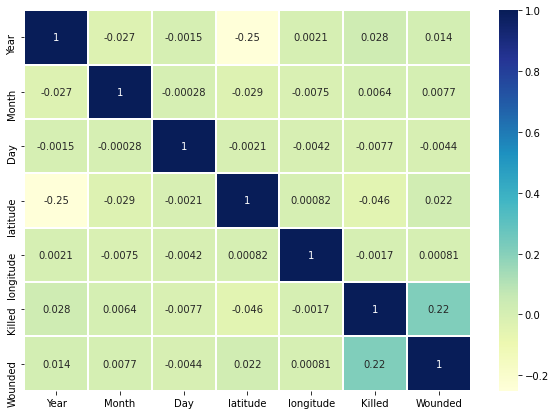

In [32]:
plt.figure(figsize = (10,7))
sns.heatmap(trr.corr(), cmap="YlGnBu", annot=True, xticklabels='auto', yticklabels='auto', linewidth=1 )

**Terrorist activities each year**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


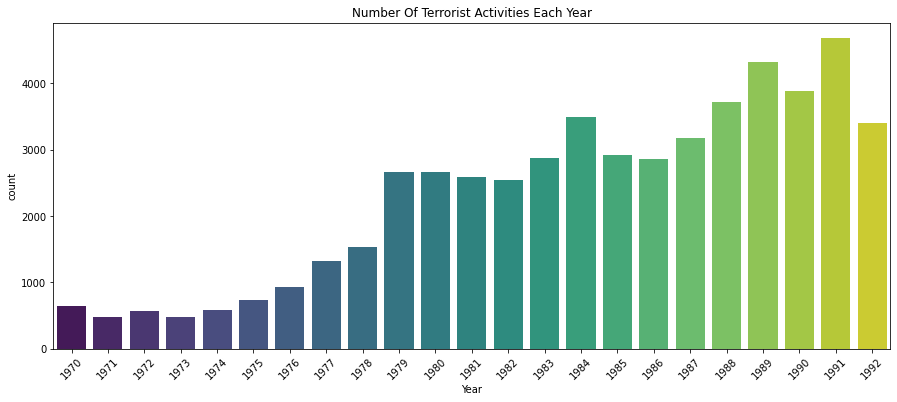

In [33]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=trr,palette="viridis")
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()



*   There has been a gradual increase in Terror Activities since 2004.
* Highest number of terror activities occurred in the year 2014.
* After 2014 the terror activities started to decrease.
   



**Terrorist activities in each region**

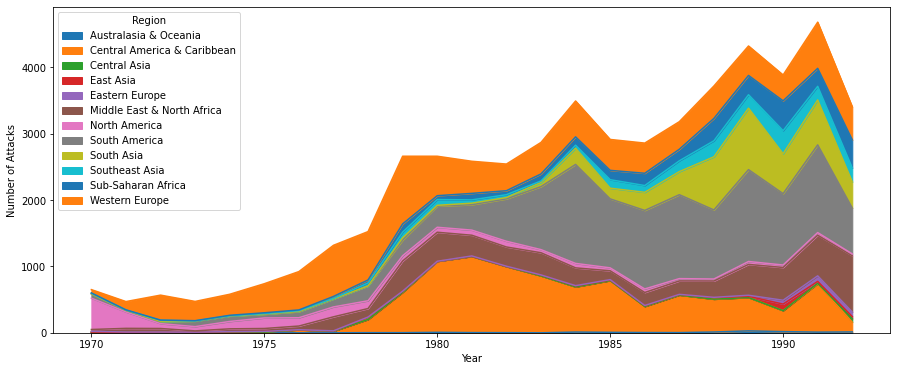

In [34]:
pd.crosstab(trr.Year, trr.Region).plot(kind='area',figsize=(15,6))
plt.ylabel('Number of Attacks')
plt.show()

* Maximum Attacks have been in Central America, followed by Australasia in the year 2010.
* There have been very less terror casualties in: East Asia, North America.
* In East Asia the number of attack gradually reduced to 0 after the year 1990.

In [35]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
trr['casualities'] = trr['Killed'] + trr['Wounded']
trr1 = trr.sort_values(by='casualities',ascending=False)[:50]
heat=trr1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attacks in History from 1982 to 2016')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* The Worst Attack took place in the US in the year 2001 with a total casualty of 9574.
* After the 9/11 attacks the security measures in the US were escalated in such a way that no attacks took place until the year 2017.
* Kenya had the 2nd worst attack in the 1998 with 4224 Casualties, after that proper security measures were taken to avoid any such incident.
* Russia had its worst attack in the year 2004 with 1071 casualties, since then there has been no major attack.

**Top 10 countries affected by Terror attacks**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


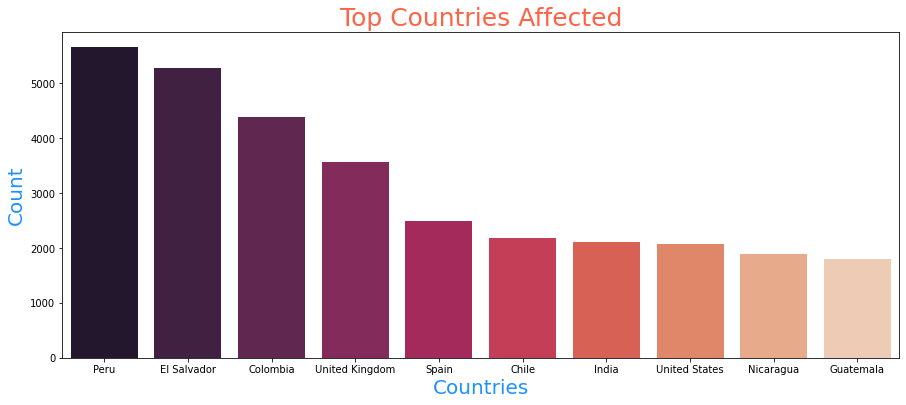

In [36]:
plt.subplots(figsize=(15,6))
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
sns.barplot(trr['Country'].value_counts()[:10].index, trr['Country'].value_counts()[:10].values,palette='rocket')
plt.title('Top Countries Affected', fontdict=style1 )
plt.xlabel('Countries' , fontdict=style2 )
plt.ylabel('Count', fontdict=style2 )
#plt.xticks(rotation= 90)
plt.show()

In [37]:
weapon_cross = pd.crosstab(trr["Weapon_type"], trr["Region"])
weapon_cross

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Weapon_type,,,,,,,,,,,,
Biological,0,0,0,2,0,0,4,0,0,0,0,2
Chemical,0,1,0,2,0,9,13,6,5,1,3,25
Explosives,50,2929,20,111,134,2829,1325,6685,1433,692,1489,5659
Fake Weapons,0,0,0,0,1,2,2,0,0,0,1,1
Firearms,49,5366,29,16,103,1944,316,5101,2504,991,888,3046
Incendiary,25,394,2,168,22,421,488,695,214,72,165,1488
Melee,3,28,1,22,2,261,20,61,72,13,80,119
Other,0,0,0,2,0,1,2,4,2,0,3,11
Radiological,0,0,0,0,0,0,1,0,0,0,0,2


Mostly explosives and firearms are used.

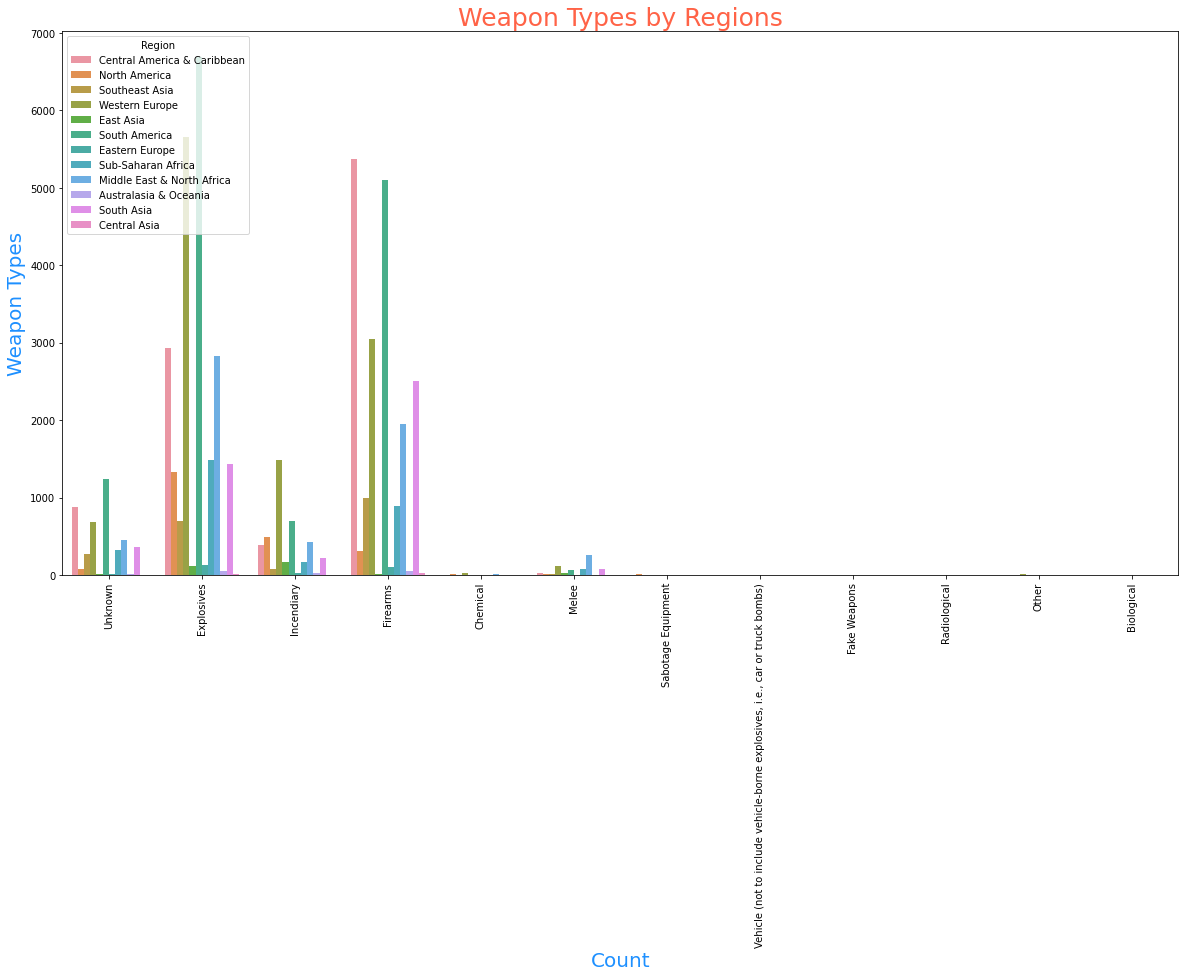

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x="Weapon_type", hue="Region", data=trr)
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
plt.title("Weapon Types by Regions", fontdict = style1)
plt.ylabel("Weapon Types", fontdict = style2 )
plt.xlabel("Count", fontdict = style2)
plt.xticks(rotation=90)
plt.show()

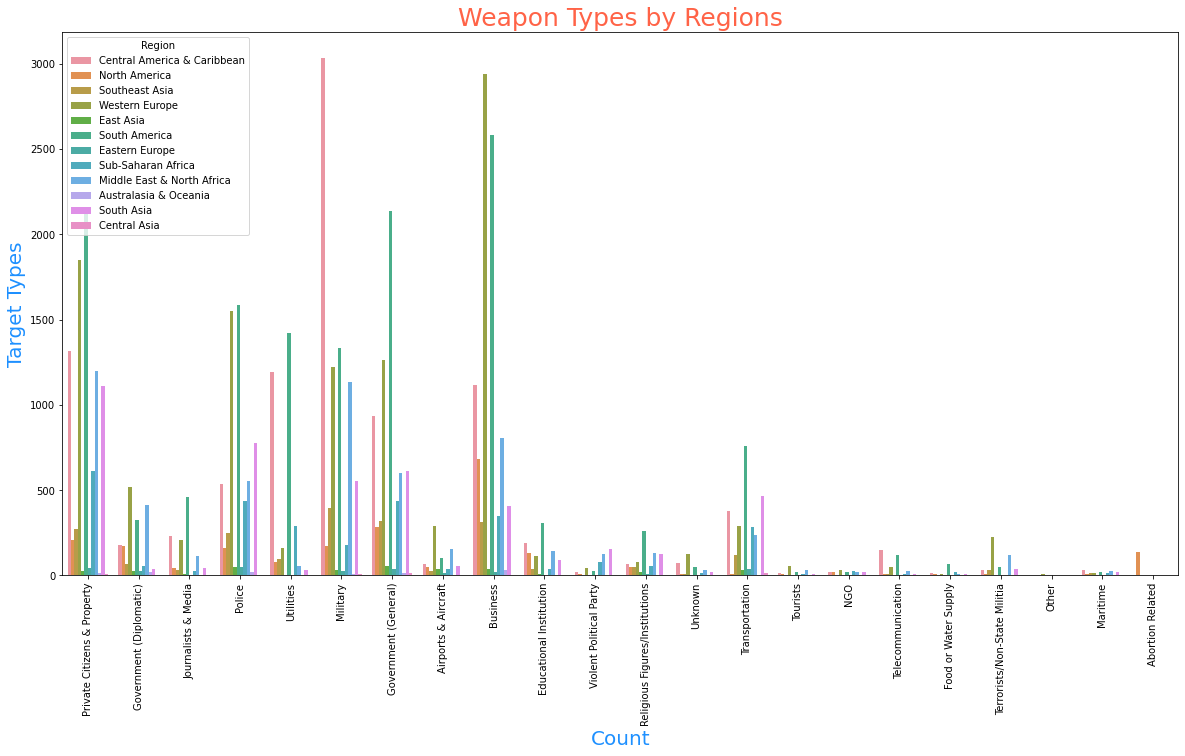

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(x="Target_type", hue="Region", data=trr)
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
plt.title("Weapon Types by Regions", fontdict = style1)
plt.ylabel("Target Types", fontdict = style2 )
plt.xlabel("Count", fontdict = style2)
plt.xticks(rotation=90)
plt.show()

1. In Middle East region most attacks have been carried out on Private citizens followed by military.
2. Most of the transportation and violent political party attacks have been witnessed by the South Asian Countries.
3. The South Asian countries need to tighten up security measures in the police, military, Government, Business, Educational, and religious sectors.

**Evaluating**

In [40]:
print("Country with the most attacks:",trr['Country'].value_counts().idxmax())
print("City with the most attacks:",trr['city'].value_counts().index[1]) 
print("Region with the most attacks:",trr['Region'].value_counts().idxmax())
print("Year with the most attacks:",trr['Year'].value_counts().idxmax())
print("Month with the most attacks:",trr['Month'].value_counts().idxmax())
print("Group with the most attacks:",trr['Group'].value_counts().index[1])
print("Most Attack Types:",trr['AttackType'].value_counts().idxmax())
print("Most Target Types:",trr['Target_type'].value_counts().idxmax())

Country with the most attacks: Peru
City with the most attacks: Lima
Region with the most attacks: South America
Year with the most attacks: 1991
Month with the most attacks: 5
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion
Most Target Types: Business


# **Conclusion**

---
1. There has been a gradual increase in Terror Activities since 2004.
2. Highest number of terror activities occurred in the year 2014.
3. After 2014 the terror activities started to decrease.
4. Maximum Attacks have been in Central America, followed by Australasia in the year 2010.
5. There have been very less terror casualties in: East Asia, North America.
6. In East Asia the number of attacks gradually reduced to 0 after the year 1990.
7. The Worst Attack took place in the US in the year 2001 with a total casualty of 9574.
8. After the 9/11 attack the security measures in the US were escalated in such a way that no attacks took place until the year 2017.
9. Kenya had the 2nd worst attack in the 1998 with 4224 Casualties, after that proper security measures were taken to avoid any such incident.
10. Russia had its worst attack in the year 2004 with 1071 casualties, since then there has been no major attack.
11. Mostly there is usage of Explosives and Firearms as Weapons.
12. In middle East region most attacks have been carried out on Private citizens followed by military.
13. Most of the transportation and violent political party attacks have been witnessed by the South Asian Countries.
14. The South Asian countries need to tighten up security measures in the police, military, Government, Business, Educational, and religious sectors.



